In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.dataset import create_detection_datasets, DetectionDataset
from src.utils.config import DATA_PATH
import numpy as np
import torch
import matplotlib.pyplot as plt
from src.visualization import plot_yolo_labels

In [3]:
ds_path = DATA_PATH / "VOC"

In [4]:
train_ds, val_ds, test_ds = create_detection_datasets(7, 2, ds_path)

In [61]:
def plot_transform(dataset: DetectionDataset, idx: int):
    raw_img, annots = dataset.get_raw_data(idx)
    annots = np.array([[float(x) for x in label.split(" ")] for label in annots])
    boxes_xywhn = annots[:, 1:]
    class_ids = annots[:, 0].astype(np.int_)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    raw_boxes_img = plot_yolo_labels(
        raw_img, boxes_xywhn, class_ids, id2label=train_ds.id2label, plot=True, ax=axes[0]
    )
    
    transformed_img, transformed_boxes, transformed_class_ids = dataset._transform(raw_img, boxes_xywhn, class_ids)
    transformed_boxes_img = plot_yolo_labels(
        (transformed_img.permute(1, 2, 0).numpy() * 255).astype(np.uint8), 
        transformed_boxes.numpy(), 
        transformed_class_ids.numpy(), 
        id2label=train_ds.id2label, 
        plot=True, 
        ax=axes[1]
    )

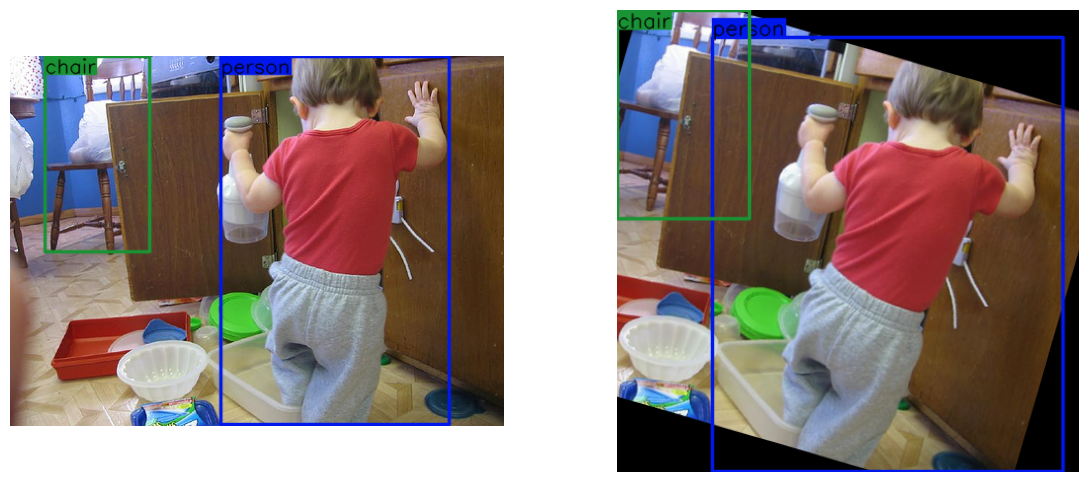

In [162]:
plot_transform(train_ds, 555)